# Notebook for plotting redshift distributions of absolute magnitude

### Improt and Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM

data = pd.read_csv('../DATA/ZFOURGE/CDFS/CDFS_MAIN.csv')
df = pd.DataFrame(data)
df = df[df['Use'] == 1] # 13,299
df = df[df['FKs'] > 0] # 12,676

mag_lim = 27 # Limiting magnitude for the survey
redshift_bins = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6)] # Redshift bins
sigma_limit = 1 # SNR must be greater than this value
n_lum_bins = 30 # Number of luminosity bins

### Overall Magnitude Distribution

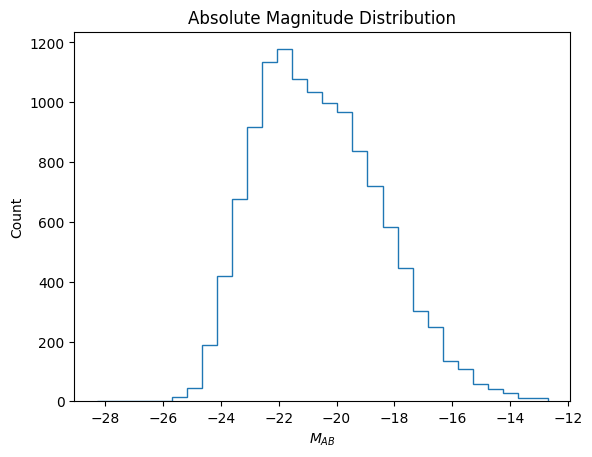

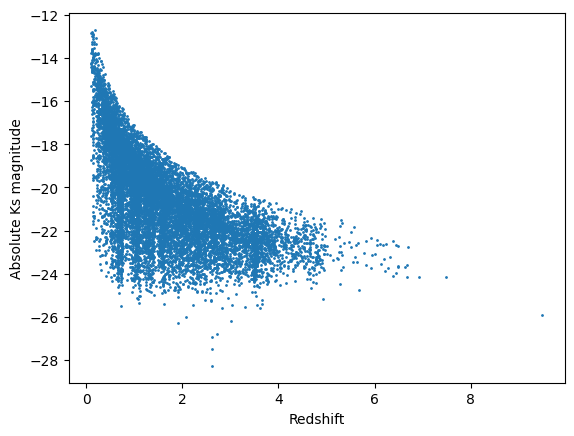

In [2]:
z = df['zpk'] # redshift
mag_app = df['FKs'] # apparent magnitude

mag_ab = 25 - 2.5*np.log10(mag_app) # apparent magnitude -> AB magnitude

cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
dists = cosmo.luminosity_distance(z) # Mpc
dists *= 10 ** 6 # Mpc -> pc
Mag_abs = mag_ab - 5 * np.log10(dists / 10) # AB magnitude -> absolute magnitude

mask = (mag_ab <= mag_lim)

plt.title('Absolute Magnitude Distribution')
plt.hist(Mag_abs[mask], bins=n_lum_bins, histtype='step')
plt.xlabel('$M_{AB}$')
plt.ylabel('Count')
plt.show()

plt.scatter(z[mask], Mag_abs[mask], s=1)
plt.xlabel('Redshift')
plt.ylabel('Absolute Ks magnitude')
plt.show()

### Redshift Distribution

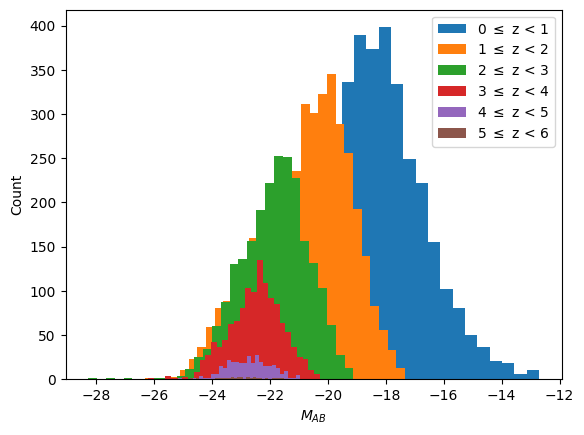

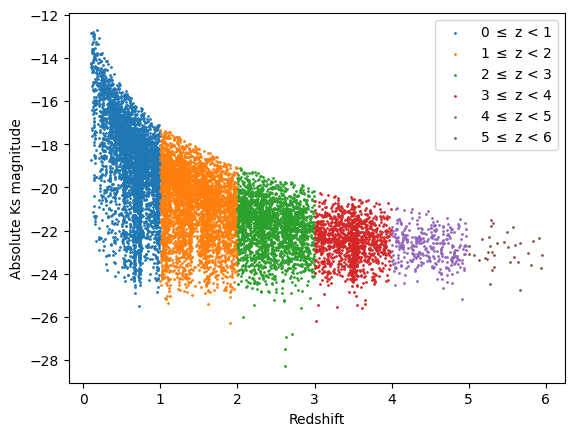

In [3]:
for z_min, z_max in redshift_bins:
    mask = (z >= z_min) & (z < z_max) & (mag_ab <= mag_lim)
    plt.hist(Mag_abs[mask], bins=n_lum_bins, label=f'{z_min} $\leq$ z < {z_max}')
    plt.xlabel('$M_{AB}$')
    plt.ylabel('Count')
plt.legend()
plt.show()

for z_min, z_max in redshift_bins:
    mask = (z >= z_min) & (z < z_max) & (mag_ab <= mag_lim)
    plt.scatter(z[mask], Mag_abs[mask], s=1, label=f'{z_min} $\leq$ z < {z_max}')
    plt.xlabel('Redshift')
    plt.ylabel('Absolute Ks magnitude')
plt.legend()
plt.show()

# Ensuring all bands meet minimum sigma limit

In [4]:
mask = (mag_ab <= mag_lim)
SNR_36 = df['F3.6'] / df['e_F3.6']
SNR_45 = df['F4.5'] / df['e_F4.5']
SNR_58 = df['F5.8'] / df['e_F5.8']
SNR_80 = df['F8.0'] / df['e_F8.0']
SNR_24 = df['F24'] / df['e_F24']

SNR_36_mask = (SNR_36 >= sigma_limit)
SNR_45_mask = (SNR_45 >= sigma_limit)
SNR_58_mask = (SNR_58 >= sigma_limit)
SNR_80_mask = (SNR_80 >= sigma_limit)
SNR_24_mask = (SNR_24 >= sigma_limit)

df = df[mask & SNR_36_mask & SNR_45_mask & SNR_58_mask & SNR_80_mask & SNR_24_mask]

### New Overall Distribution

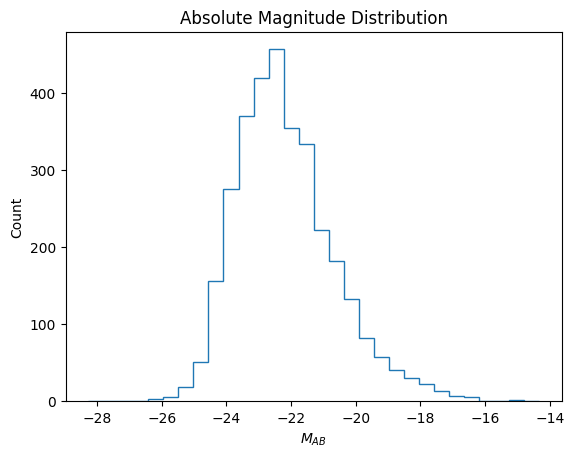

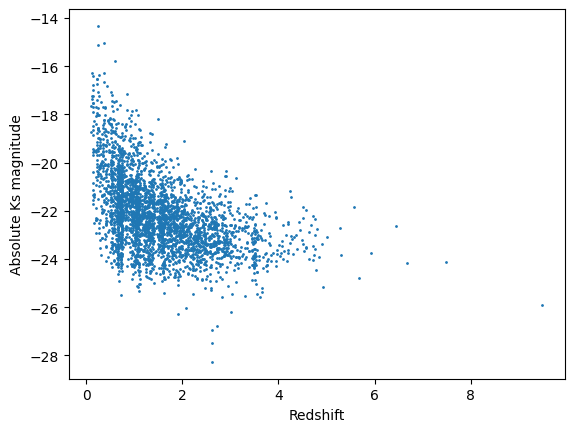

In [5]:
z = df['zpk'] # redshift
mag_app = df['FKs'] # apparent magnitude

mag_ab = 25 - 2.5*np.log10(mag_app) # apparent magnitude -> AB magnitude

cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
dists = cosmo.luminosity_distance(z) # Mpc
dists *= 10 ** 6 # Mpc -> pc
Mag_abs = mag_ab - 5 * np.log10(dists / 10) # AB magnitude -> absolute magnitude

mask = (mag_ab <= mag_lim)

plt.title('Absolute Magnitude Distribution')
plt.hist(Mag_abs[mask], bins=n_lum_bins, histtype='step')
plt.xlabel('$M_{AB}$')
plt.ylabel('Count')
plt.show()

plt.scatter(z[mask], Mag_abs[mask], s=1)
plt.xlabel('Redshift')
plt.ylabel('Absolute Ks magnitude')
plt.show()

### New Redshift Distribution

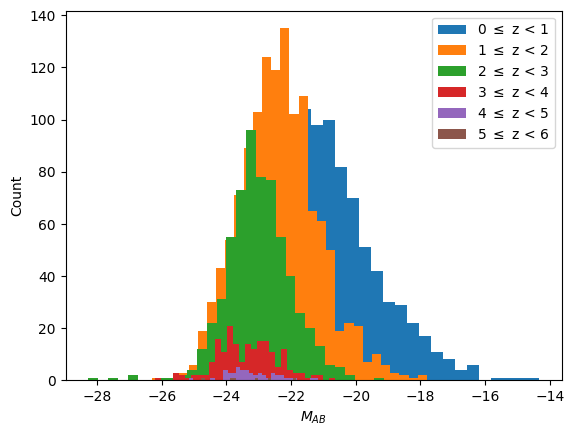

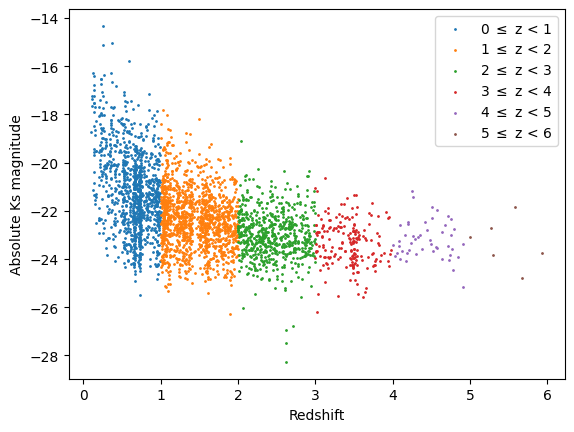

In [6]:
for z_min, z_max in redshift_bins:
    mask = (z >= z_min) & (z < z_max) & (mag_ab <= mag_lim)
    plt.hist(Mag_abs[mask], bins=n_lum_bins, label=f'{z_min} $\leq$ z < {z_max}')
    plt.xlabel('$M_{AB}$')
    plt.ylabel('Count')
plt.legend()
plt.show()

for z_min, z_max in redshift_bins:
    mask = (z >= z_min) & (z < z_max) & (mag_ab <= mag_lim)
    plt.scatter(z[mask], Mag_abs[mask], s=1, label=f'{z_min} $\leq$ z < {z_max}')
    plt.xlabel('Redshift')
    plt.ylabel('Absolute Ks magnitude')
plt.legend()
plt.show()